In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from transformers import pipeline, BertTokenizer, BertForSequenceClassification
from wordcloud import WordCloud
import demoji
# Required Libraries
from collections import Counter
import re
# https://www.kaggle.com/datasets/ryosyo0/chatgpt-tweets-sentiment-analysis-clean-data
data=pd.read_csv('C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv')
data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8320\1663171495.py:16: DtypeWarning: Columns (6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv')


,Text,negative,neutral,positive,predicted_label,date,retweets,replies,likes,location,followers,following
0,if i were a journalist or reporter writing cli...,0.375516,0.373832,0.250651,1.0,2023-02-10 23:59:49+00:00,0,0,1,Fukuoka 福岡 | Japan 日本,2012,388
1,imagine if the mid season twist was that theyr...,0.133336,0.262687,0.603978,2.0,2023-02-10 23:59:35+00:00,1,2,8,"Manhattan, NY",19855,5722
2,i see the difference between leader and employ...,0.222123,0.398647,0.379230,2.0,2023-02-10 23:59:18+00:00,0,1,4,NaN,23,577
3,which means your job is at riskman facepalming...,0.491551,0.438901,0.069549,1.0,2023-02-10 23:59:16+00:00,0,0,0,NaN,108,224
4,what have you been using chatgpt for,0.014945,0.963082,0.021973,2.0,2023-02-10 23:59:16+00:00,0,1,1,"Chicago, IL",11155,478


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975453 entries, 0 to 975452
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Text             975227 non-null  object 
 1   negative         975228 non-null  float64
 2   neutral          975228 non-null  float64
 3   positive         975227 non-null  float64
 4   predicted_label  975227 non-null  float64
 5   date             975452 non-null  object 
 6   retweets         975452 non-null  object 
 7   replies          975452 non-null  object 
 8   likes            975452 non-null  object 
 9   location         705267 non-null  object 
 10  followers        975451 non-null  object 
 11  following        975451 non-null  object 
dtypes: float64(4), object(8)
memory usage: 89.3+ MB


In [3]:
data.isnull().sum()

Text                  226
negative              225
neutral               225
positive              226
predicted_label       226
date                    1
retweets                1
replies                 1
likes                   1
location           270186
followers               2
following               2
dtype: int64

In [4]:
data['Text'].fillna("No content available", inplace=True)

# Replace float columns with their mean values
data['negative'].fillna(data['negative'].mean(), inplace=True)
data['neutral'].fillna(data['neutral'].mean(), inplace=True)
data['positive'].fillna(data['positive'].mean(), inplace=True)
data['predicted_label'].fillna(data['predicted_label'].mean(), inplace=True)

data['date'].fillna("Unknown Date", inplace=True)  # Placeholder for missing date

data['retweets'].fillna(data['retweets'].mode()[0], inplace=True)  # Fill with mode
data['replies'].fillna(data['replies'].mode()[0], inplace=True)  # Fill with mode
data['likes'].fillna(data['likes'].mode()[0], inplace=True)  # Fill with mode

data['location'].fillna("Unknown Location", inplace=True)  # Placeholder for location

data['followers'].fillna(data['followers'].mode()[0], inplace=True)  # Fill with mode
data['following'].fillna(data['following'].mode()[0], inplace=True)  # Fill with mode

# Display a sample of the cleaned DataFrame
print(data.info(),'\n',data.head())

C:\Users\Asus\AppData\Local\Temp\ipykernel_8320\1688910113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Text'].fillna("No content available", inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8320\1688910113.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975453 entries, 0 to 975452
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Text             975453 non-null  object 
 1   negative         975453 non-null  float64
 2   neutral          975453 non-null  float64
 3   positive         975453 non-null  float64
 4   predicted_label  975453 non-null  float64
 5   date             975453 non-null  object 
 6   retweets         975453 non-null  object 
 7   replies          975453 non-null  object 
 8   likes            975453 non-null  object 
 9   location         975453 non-null  object 
 10  followers        975453 non-null  object 
 11  following        975453 non-null  object 
dtypes: float64(4), object(8)
memory usage: 89.3+ MB
None 
                                                 Text  negative   neutral  \
0  if i were a journalist or reporter writing cli...  0.375516  0.373832   
1  imagine if the m

In [5]:
# Display a sample of the cleaned DataFrame
print(data.info(),'\n',data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975453 entries, 0 to 975452
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Text             975453 non-null  object 
 1   negative         975453 non-null  float64
 2   neutral          975453 non-null  float64
 3   positive         975453 non-null  float64
 4   predicted_label  975453 non-null  float64
 5   date             975453 non-null  object 
 6   retweets         975453 non-null  object 
 7   replies          975453 non-null  object 
 8   likes            975453 non-null  object 
 9   location         975453 non-null  object 
 10  followers        975453 non-null  object 
 11  following        975453 non-null  object 
dtypes: float64(4), object(8)
memory usage: 89.3+ MB
None 
                                                 Text  negative   neutral  \
0  if i were a journalist or reporter writing cli...  0.375516  0.373832   
1  imagine if the m

In [12]:
data['predicted_label'].value_counts()

predicted_label
2.000000    584929
1.000000    390298
1.599788       226
Name: count, dtype: int64

In [13]:
data.describe()

,negative,neutral,positive,predicted_label
count,975453.000000,975453.000000,975453.000000,975453.000000
mean,0.295522,0.418487,0.286130,1.599788
std,0.316278,0.295977,0.270246,0.489885
min,0.002469,0.006142,0.004174,1.000000
25%,0.067456,0.160016,0.065976,1.000000
50%,0.154197,0.409811,0.194889,2.000000
75%,0.415870,0.643789,0.441672,2.000000
max,40.000000,97.000000,0.988704,2.000000


<Figure size 700x800 with 0 Axes>

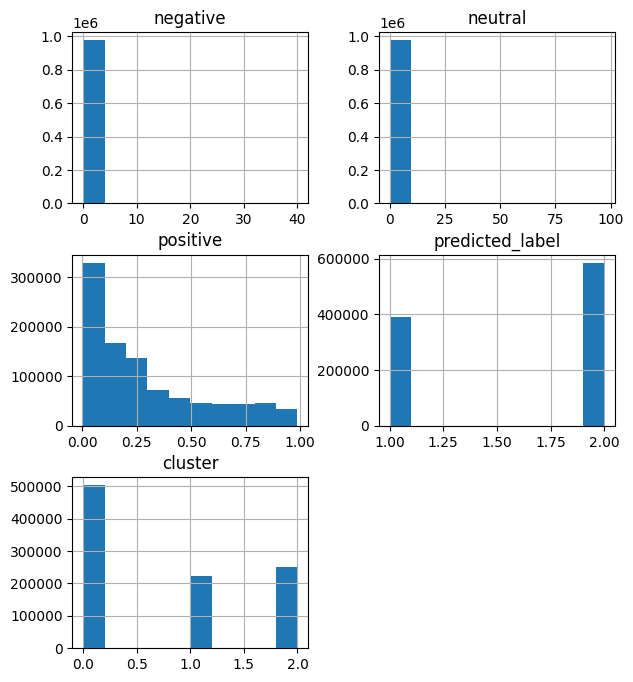

In [7]:
hist_plot = data.select_dtypes(include=['int64', 'float64']).keys()

# Set figure size
plt.figure(figsize=(7, 8))

# Plot histograms
data[hist_plot].hist(figsize=(7, 8))  # Adjust figure size here
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_2656\1981520034.py:1: DtypeWarning: Columns (6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv')


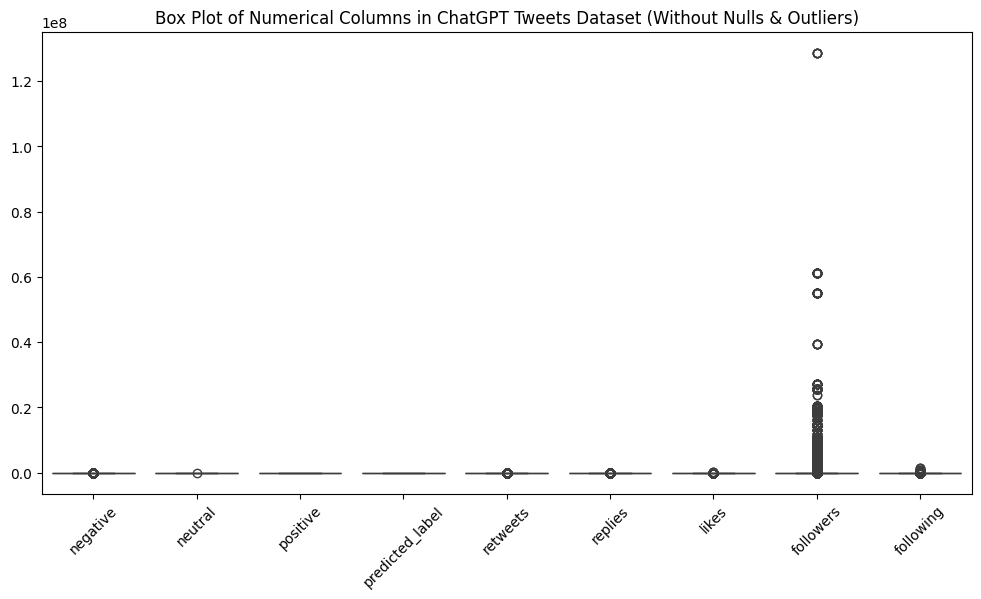

In [7]:
df=pd.read_csv('C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv')
numeric_cols = ['negative', 'neutral', 'positive', 'predicted_label', 'retweets'
                , 'replies', 'likes', 'followers', 'following']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert non-numeric values to NaN

# Drop null values
data = data.dropna()

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Columns in ChatGPT Tweets Dataset (Without Nulls & Outliers)")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2656\1298776571.py:2: DtypeWarning: Columns (6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Asus\Desktop\SEM-8\FDTL.DATA SCIENCE\Project\chatgpt_clean_sentiment - Copy.csv')


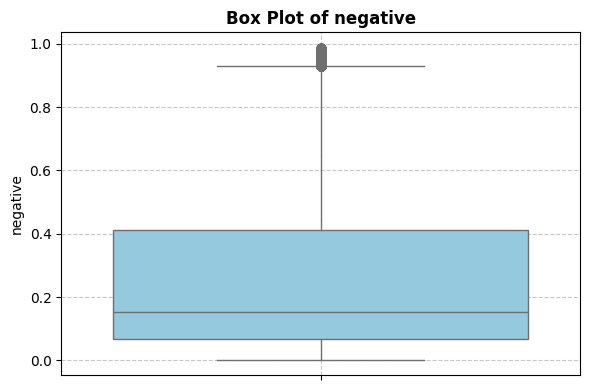

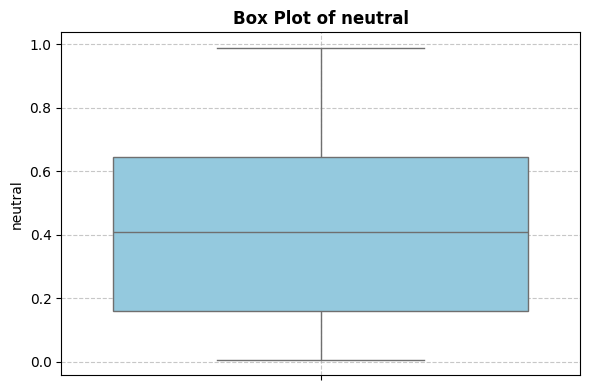

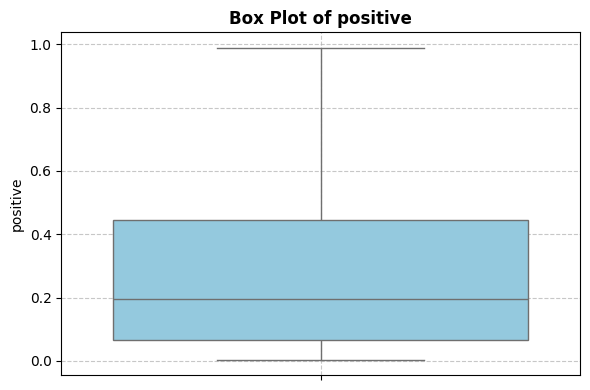

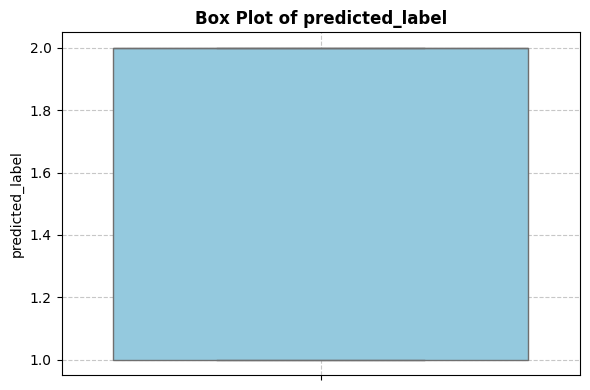

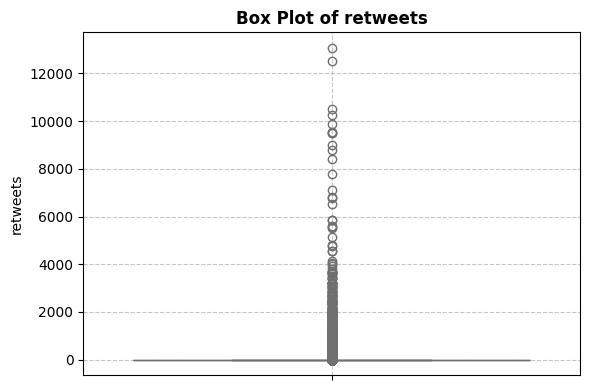

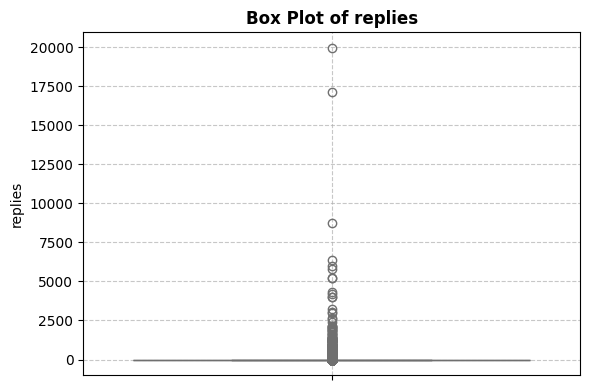

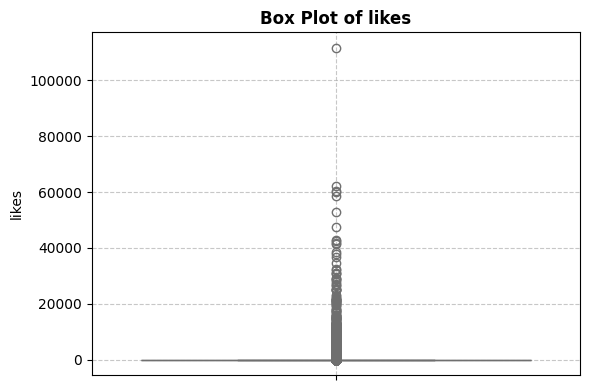

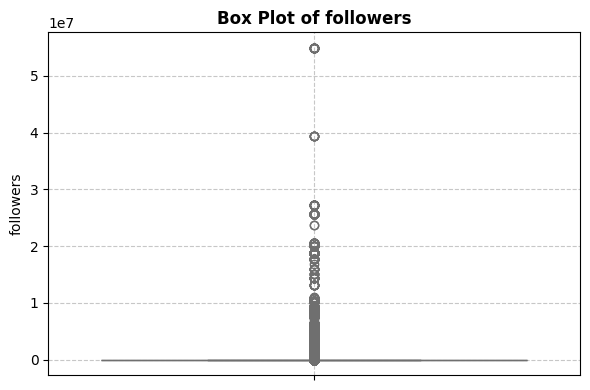

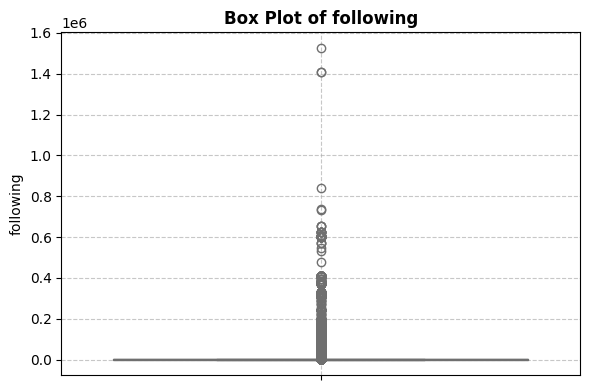

In [8]:
# Load dataset
df = pd.read_csv(r'C:\Users\Asus\Desktop\SEM-8\FDTL.DATA SCIENCE\Project\chatgpt_clean_sentiment - Copy.csv')

# Convert specific columns to numeric
numeric_cols = ['negative', 'neutral', 'positive', 'predicted_label', 'retweets',  
                'replies', 'likes', 'followers', 'following']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Convert invalid values to NaN

# Drop rows with null values
df.dropna(inplace=True)

# Plot separate boxplots for each numerical column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color="skyblue")  # Set boxplot color
    plt.title(f"Box Plot of {col}", fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

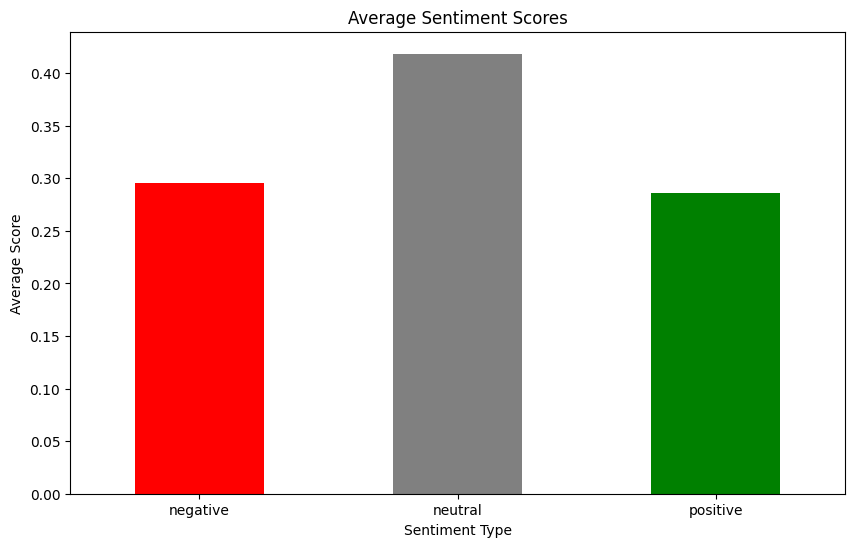

In [13]:
# Plot sentiment distributions
plt.figure(figsize=(10, 6))
data[['negative', 'neutral', 'positive']].mean().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Average Sentiment Scores')
plt.ylabel('Average Score')
plt.xlabel('Sentiment Type')
plt.xticks(rotation=0)
plt.show()

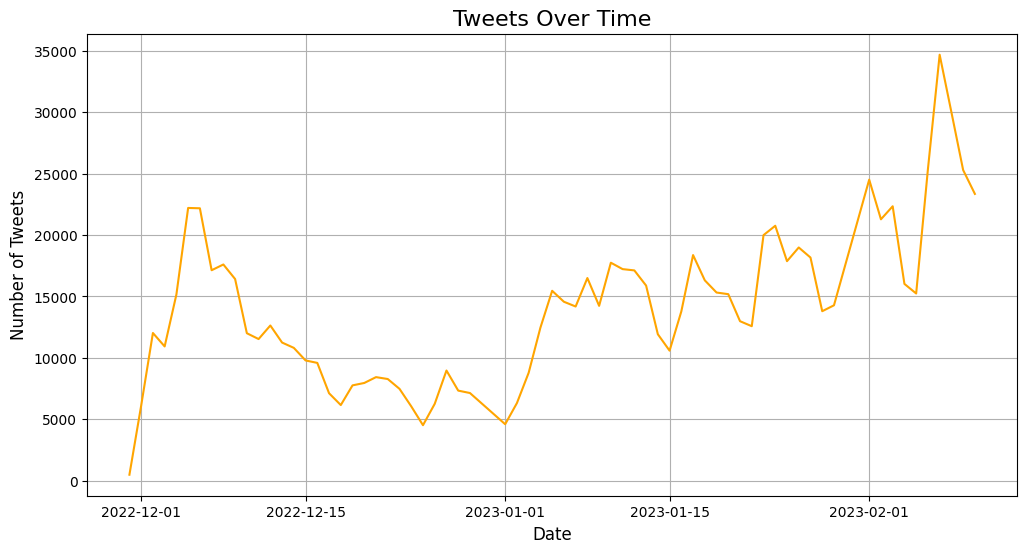

In [8]:
import pandas as pd
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])
tweets_over_time = data.groupby(data['date'].dt.date).size()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
tweets_over_time.plot(kind='line', color='orange')
plt.title('Tweets Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.grid(True)
plt.show()

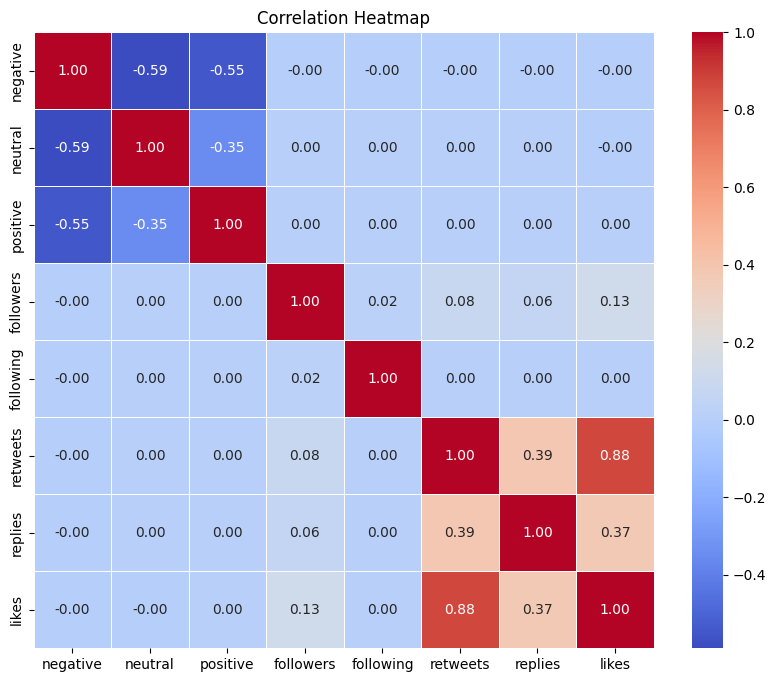

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric
for col in ['retweets', 'replies', 'likes', 'followers', 'following']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop NaN values
data = data.dropna()

# Select numerical columns
numeric_data = data[['negative', 'neutral', 'positive', 'followers', 'following', 'retweets', 'replies', 'likes']]

# Compute correlation
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

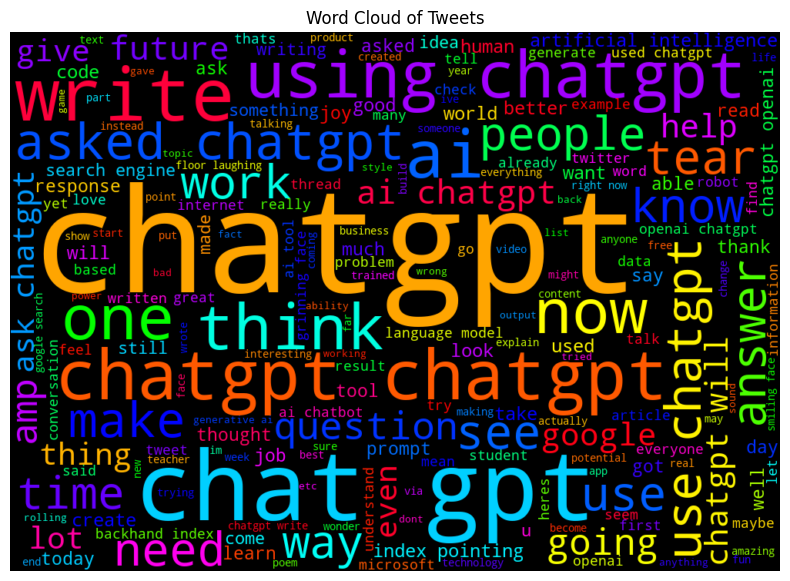

In [10]:
# there is change in word cloud
# make word cloud for data['predicted_label'].value_counts() #[ for neutral 1 and positive 2 ]
import random

# Function to assign orange to the largest word and random colors to others
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word == max(word_freq, key=word_freq.get):  # Biggest word
        return "orange"
    return "hsl({}, 100%, 50%)".format(random.randint(0, 360))  # Random color

# Prepare text data
text_data = ' '.join(data['Text'].dropna())

# Generate word frequencies
wordcloud = WordCloud(width=1000, height=700, background_color='black', colormap="viridis").generate(text_data)
word_freq = wordcloud.words_

# Generate word cloud with custom colors
wordcloud = WordCloud(width=1000, height=700, background_color='black',
                      color_func=custom_color_func).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(21, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


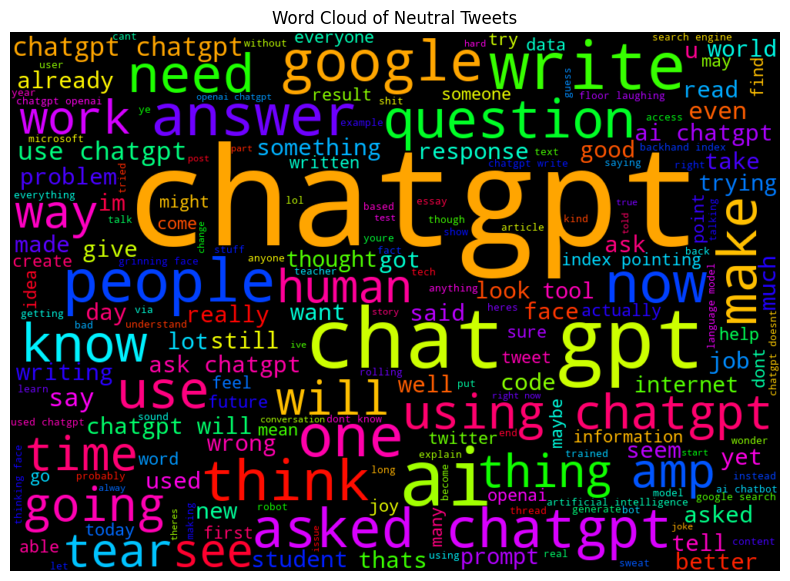

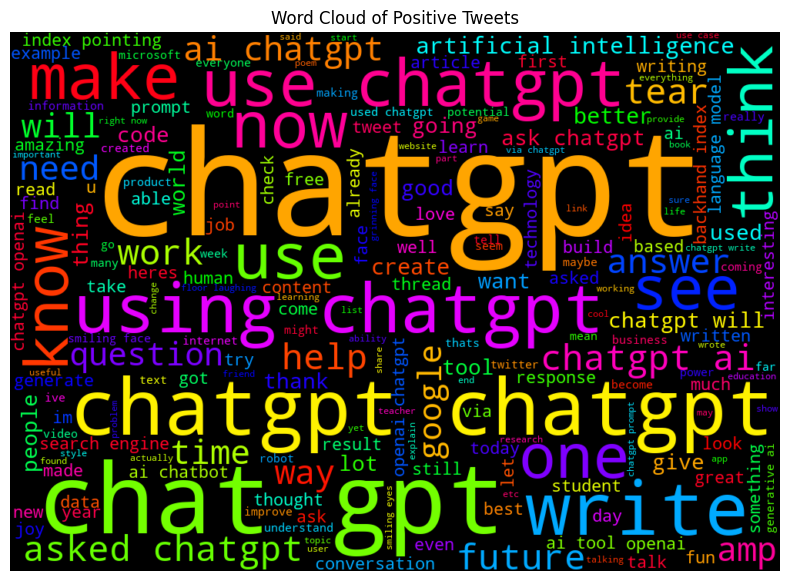

In [11]:
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to assign orange to the largest word and random colors to others
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word == max(word_freq, key=word_freq.get):  # Biggest word
        return "orange"
    return "hsl({}, 100%, 50%)".format(random.randint(0, 360))  # Random color

# Filter text data based on predicted labels
neutral_text = ' '.join(data[data['predicted_label'] == 1]['Text'].dropna())
positive_text = ' '.join(data[data['predicted_label'] == 2]['Text'].dropna())

# Generate word clouds for each category
for label, text_data, title in [(1, neutral_text, "Neutral Tweets"), (2, positive_text, "Positive Tweets")]:
    wordcloud = WordCloud(width=1000, height=700, background_color='black', colormap="viridis").generate(text_data)
    word_freq = wordcloud.words_
    
    wordcloud = WordCloud(width=1000, height=700, background_color='black',
                          color_func=custom_color_func).generate_from_frequencies(word_freq)
    
    # Display the word cloud
    plt.figure(figsize=(21, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {title}')
    plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


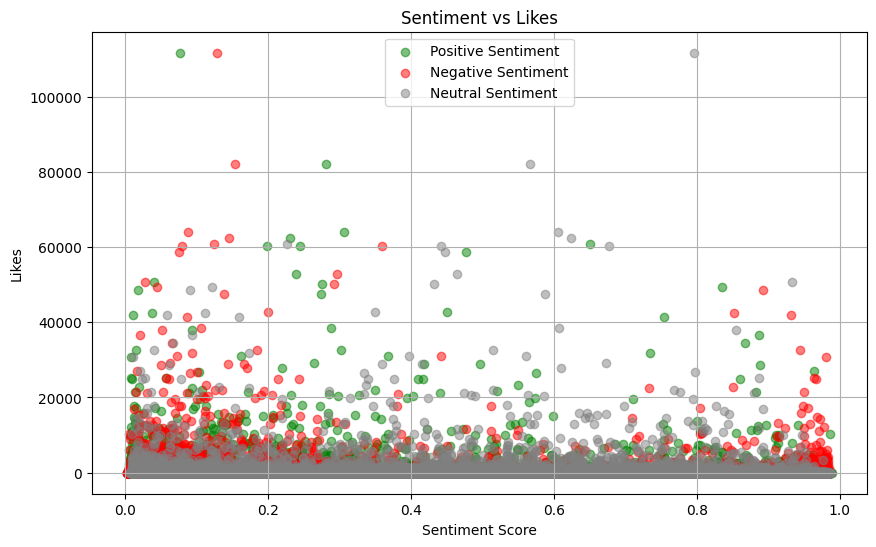

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data['positive'], data['likes'], color='green', alpha=0.5, label='Positive Sentiment')
plt.scatter(data['negative'], data['likes'], color='red', alpha=0.5, label='Negative Sentiment')
plt.scatter(data['neutral'], data['likes'], color='gray', alpha=0.5, label='Neutral Sentiment')
plt.title('Sentiment vs Likes')
plt.xlabel('Sentiment Score')
plt.ylabel('Likes')
plt.legend()
plt.grid()
plt.show()

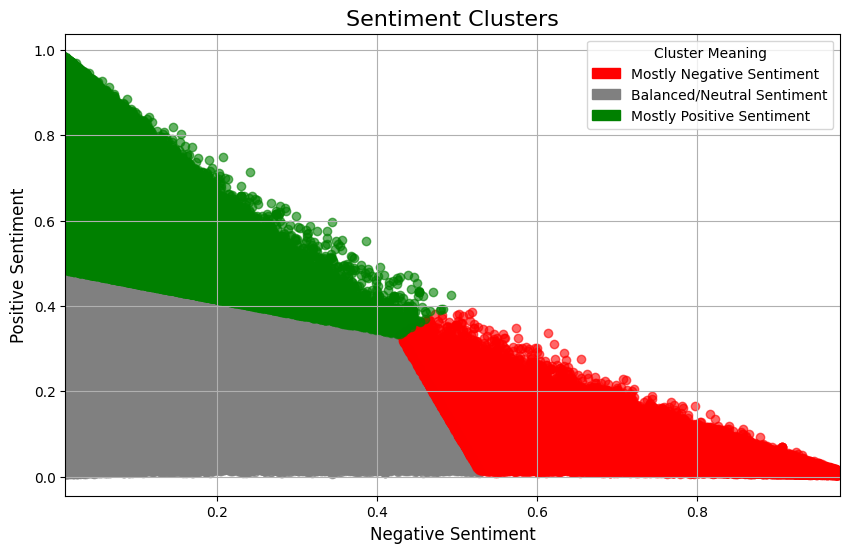

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Select features
X = data[['negative', 'neutral', 'positive']].dropna()

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit and predict
clusters = pipeline.fit_predict(X)
data.loc[X.index, 'cluster'] = clusters

# Inverse transform centers to original scale
scaler = pipeline.named_steps['scaler']
kmeans = pipeline.named_steps['kmeans']
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Determine meaning of each cluster
cluster_meanings = {}
for idx, center in enumerate(cluster_centers):
    neg, neu, pos = center
    if pos > neg and pos > neu:
        label = 'Mostly Positive Sentiment'
    elif neg > pos and neg > neu:
        label = 'Mostly Negative Sentiment'
    else:
        label = 'Balanced/Neutral Sentiment'
    cluster_meanings[idx] = label

# Define color mapping
colors_dict = {
    'Mostly Negative Sentiment': 'red',
    'Balanced/Neutral Sentiment': 'gray',
    'Mostly Positive Sentiment': 'green'
}

# Plot
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    sentiment_label = cluster_meanings[cluster]
    color = colors_dict[sentiment_label]
    plt.scatter(
        X.loc[data['cluster'] == cluster, 'negative'],
        X.loc[data['cluster'] == cluster, 'positive'],
        c=color, label=sentiment_label, alpha=0.6
    )

# Legend
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors_dict.items()]
plt.legend(handles=legend_patches, title="Cluster Meaning", loc='upper right')

# Final formatting
plt.title('Sentiment Clusters', fontsize=16)
plt.xlabel('Negative Sentiment', fontsize=12)
plt.ylabel('Positive Sentiment', fontsize=12)
plt.grid(True)
plt.xlim([X['negative'].quantile(0.01), X['negative'].quantile(0.99)])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
)
from catboost import CatBoostClassifier

# --- Custom Transformer to preprocess DataFrame ---
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_cols = ['retweets', 'replies', 'likes', 'followers'
        , 'following', 'positive', 'negative', 'neutral']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        df[self.numeric_cols] = df[self.numeric_cols].apply(pd.to_numeric, errors='coerce')
        df.drop(columns=['Text', 'date', 'location'], inplace=True, errors='ignore')
        df.fillna(0, inplace=True)

        non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
        if non_numeric_cols:
            print("Warning: Dropping non-numeric columns:", non_numeric_cols)
            df.drop(columns=non_numeric_cols, inplace=True)

        return df.astype(int)

# --- Load your data ---
df = pd.DataFrame(data)
# Separate target from features
y = df['predicted_label'].astype(int)
X = df.drop(columns=['predicted_label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Create Pipeline ---
pipeline = Pipeline([
    ('preprocessor', CustomPreprocessor()),
    ('classifier', CatBoostClassifier(verbose=0, random_state=42))
])

# --- Fit the pipeline ---
pipeline.fit(X_train, y_train)

# --- Predictions ---
y_pred_cb = pipeline.predict(X_test)
y_prob_cb = pipeline.predict_proba(X_test)[:, 1]

# --- Evaluation ---
accuracy = accuracy_score(y_test, y_pred_cb)
roc_auc = roc_auc_score(y_test, y_prob_cb)
mae = mean_absolute_error(y_test, y_prob_cb)
mse = mean_squared_error(y_test, y_prob_cb)
r2 = r2_score(y_test, y_prob_cb)

# --- Results ---
print("Predictions on the test set:", y_pred_cb)
print("Prediction Probabilities on the test set:", y_prob_cb)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Classification Report:\n", classification_report(y_test, y_pred_cb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cb))


Predictions on the test set: [2 2 2 ... 2 1 2]
Prediction Probabilities on the test set: [6.40896392e-01 7.04409736e-01 6.86742803e-01 ... 6.93083893e-01
 4.77666509e-05 7.83868887e-01]
Accuracy: 0.8301151770199547
ROC-AUC Score: 0.8818778102159363
Mean Absolute Error: 1.0002202504356132
Mean Squared Error: 1.1143186807637508
R2 Score: -3.641636775856763
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.58      0.73     78105
           2       0.78      1.00      0.88    116986

    accuracy                           0.83    195091
   macro avg       0.89      0.79      0.80    195091
weighted avg       0.87      0.83      0.82    195091

Confusion Matrix:
 [[ 45165  32940]
 [   203 116783]]


C:\Users\Asus\AppData\Local\Temp\ipykernel_23940\2371126618.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].mean(), inplace=True)


Explained variance by each PC: [0.55085334 0.44914666]


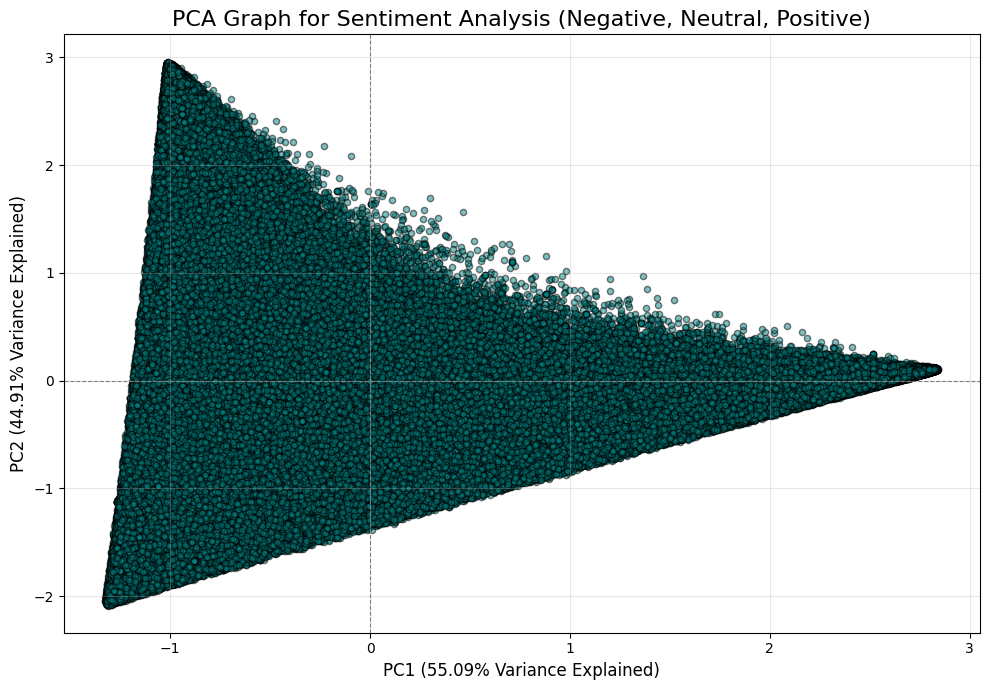

In [15]:
from sklearn.decomposition import PCA
features = ['negative', 'neutral', 'positive']
for feature in features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    data[feature].fillna(data[feature].mean(), inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])
pca = PCA(n_components=2)  # Two principal components
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each PC: {explained_variance}")

pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 7))
plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.5, edgecolor='k', s=20, c='teal')
plt.title('PCA Graph for Sentiment Analysis (Negative, Neutral, Positive)', fontsize=16)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% Variance Explained)", fontsize=12)
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% Variance Explained)", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

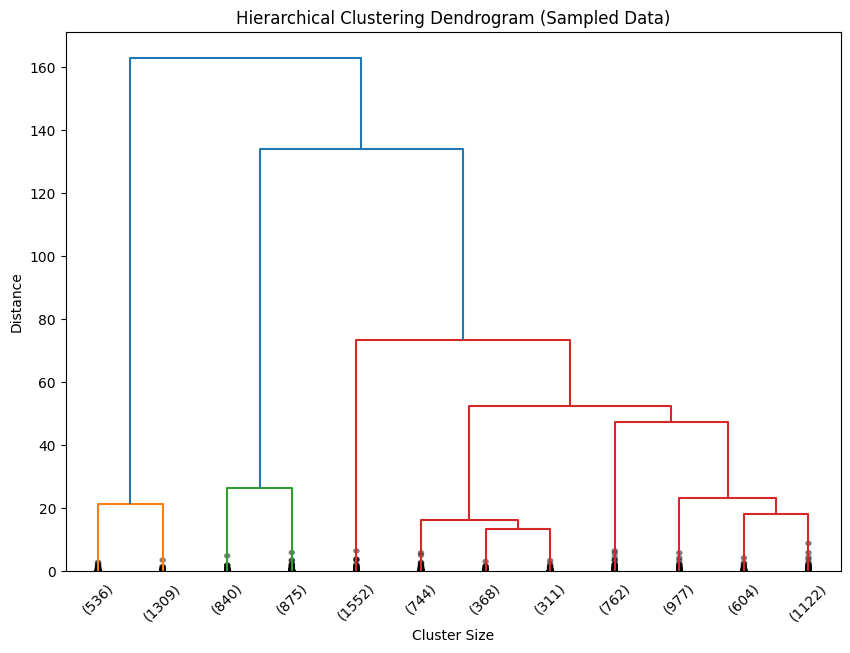

In [16]:
import numpy as np
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
sample_size = 10000  # Adjust this number based on available memory
sample_indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sampled = X_scaled[sample_indices]

Z = linkage(X_sampled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

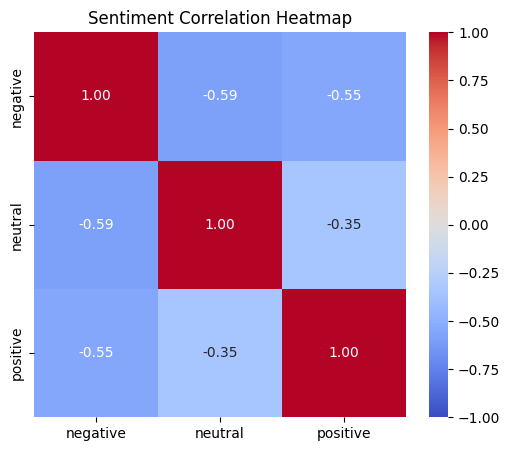

In [17]:
import seaborn as sns

correlation_matrix = data[['negative', 'neutral', 'positive']].corr()
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Sentiment Correlation Heatmap')
plt.show()

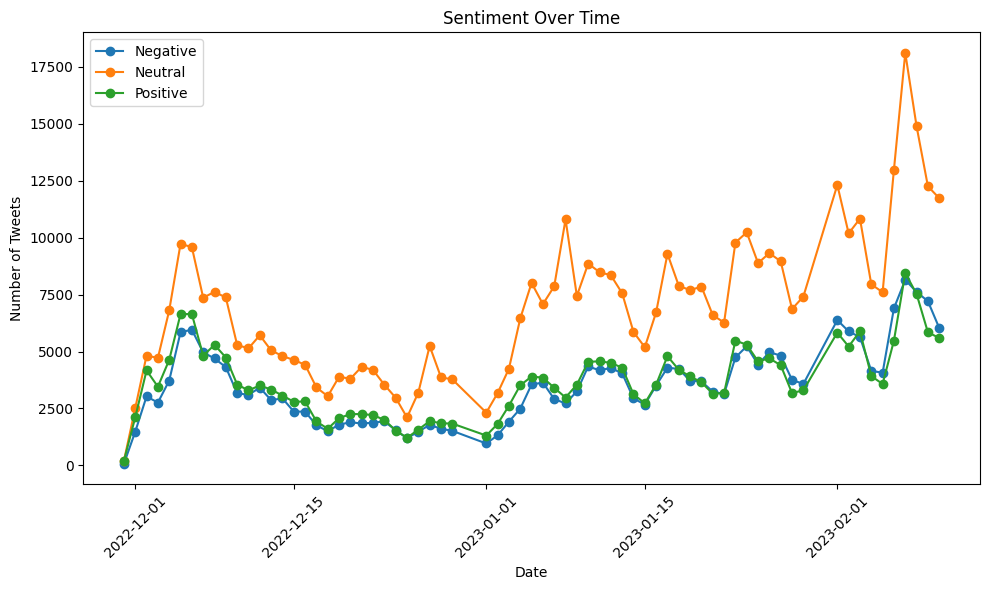

In [18]:
data['date'] = pd.to_datetime(data['date'])
data['average_sentiment'] = data[['negative', 'neutral', 'positive']].idxmax(axis=1)
sentiment_time_series = data.groupby(data['date'].dt.date)['average_sentiment'].value_counts().unstack().fillna(0)
sentiment_time_series.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

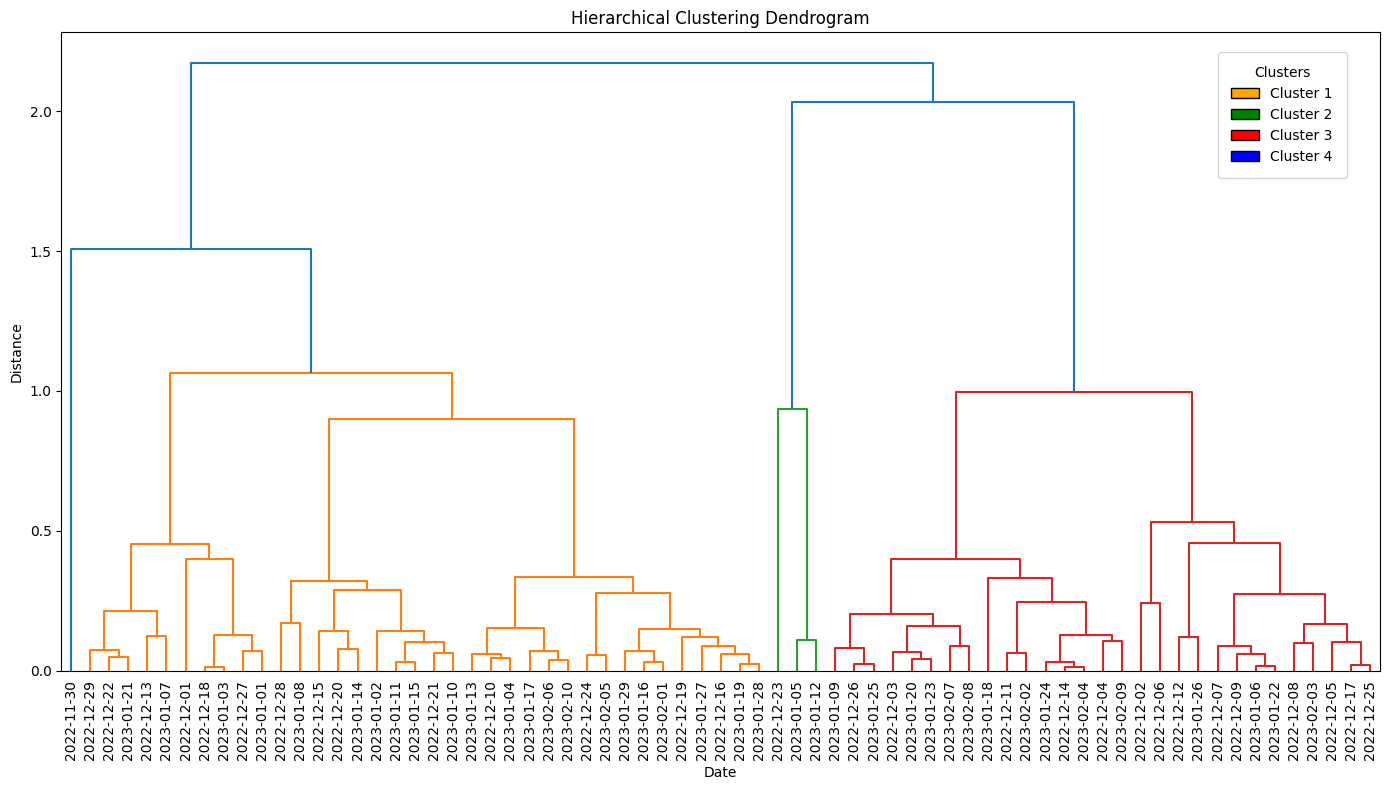

In [7]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Sample 10,000 records
sample_data = data.sample(n=10000, random_state=42)

# Convert necessary columns to numeric types and handle invalid entries
sample_data['likes'] = pd.to_numeric(sample_data['likes'], errors='coerce')
sample_data['retweets'] = pd.to_numeric(sample_data['retweets'], errors='coerce')
sample_data['date'] = pd.to_datetime(sample_data['date'], errors='coerce')
sample_data = sample_data.dropna(subset=['likes', 'retweets', 'date', 'positive', 'negative', 'neutral'])

# Aggregate by date
aggregated_data = sample_data.groupby(sample_data['date'].dt.date).agg({
    'positive': 'mean',
    'negative': 'mean',
    'neutral': 'mean',
    'likes': 'sum',
    'retweets': 'sum'
}).dropna()

# Normalize data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data)

# Perform hierarchical clustering
linkage_matrix = linkage(normalized_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 8))
dendrogram(
    linkage_matrix, 
    labels=pd.to_datetime(aggregated_data.index).strftime('%Y-%m-%d'), 
    leaf_rotation=90, 
    leaf_font_size=10,
    color_threshold=1.5  # Controls cluster color segmentation
)

# Custom legend for color-coded clusters
legend_elements = [
    Patch(facecolor='orange', edgecolor='black', label='Cluster 1'),
    Patch(facecolor='green', edgecolor='black', label='Cluster 2'),
    Patch(facecolor='red', edgecolor='black', label='Cluster 3'),
    Patch(facecolor='blue', edgecolor='black', label='Cluster 4'),
]

# Place legend inside the plot at upper right corner
plt.legend(
    handles=legend_elements,
    title='Clusters',
    loc='upper right',          # Inside upper-right of the plot
    bbox_to_anchor=(0.98, 0.98), # Slightly move it inward
    frameon=True,
    borderpad=1
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Date')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


Dataset Shape: (975450, 14)

Dataset Columns: Index(['Text', 'negative', 'neutral', 'positive', 'predicted_label', 'date',
       'retweets', 'replies', 'likes', 'location', 'followers', 'following',
       'cluster', 'average_sentiment'],
      dtype='object')

Missing Values:
 Text                 0
negative             0
neutral              0
positive             0
predicted_label      0
date                 0
retweets             0
replies              0
likes                0
location             0
followers            0
following            0
cluster              0
average_sentiment    0
dtype: int64

Data Types:
 Text                              object
negative                         float64
neutral                          float64
positive                         float64
predicted_label                  float64
date                 datetime64[ns, UTC]
retweets                         float64
replies                          float64
likes                            float64
lo

C:\Users\Asus\AppData\Local\Temp\ipykernel_23940\2593341225.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['predicted_label'], palette='coolwarm')


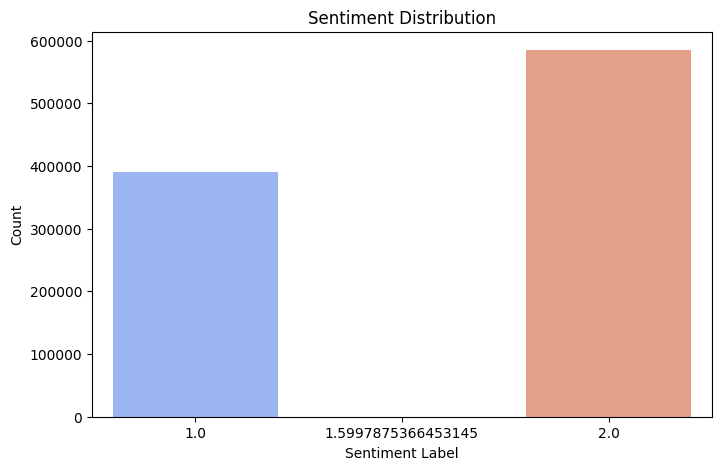

In [20]:
# Display Basic Information
print("Dataset Shape:", data.shape)
print("\nDataset Columns:", data.columns)
print("\nMissing Values:\n", data.isnull().sum())

# Data Types
print("\nData Types:\n", data.dtypes)

# Summary Statistics
print("\nNumerical Summary:\n", data.describe())

# Categorical Summary
print("\nCategorical Columns Unique Values:\n")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")

# Data Distribution - Sentiment Analysis
plt.figure(figsize=(8,5))
sns.countplot(x=data['predicted_label'], palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

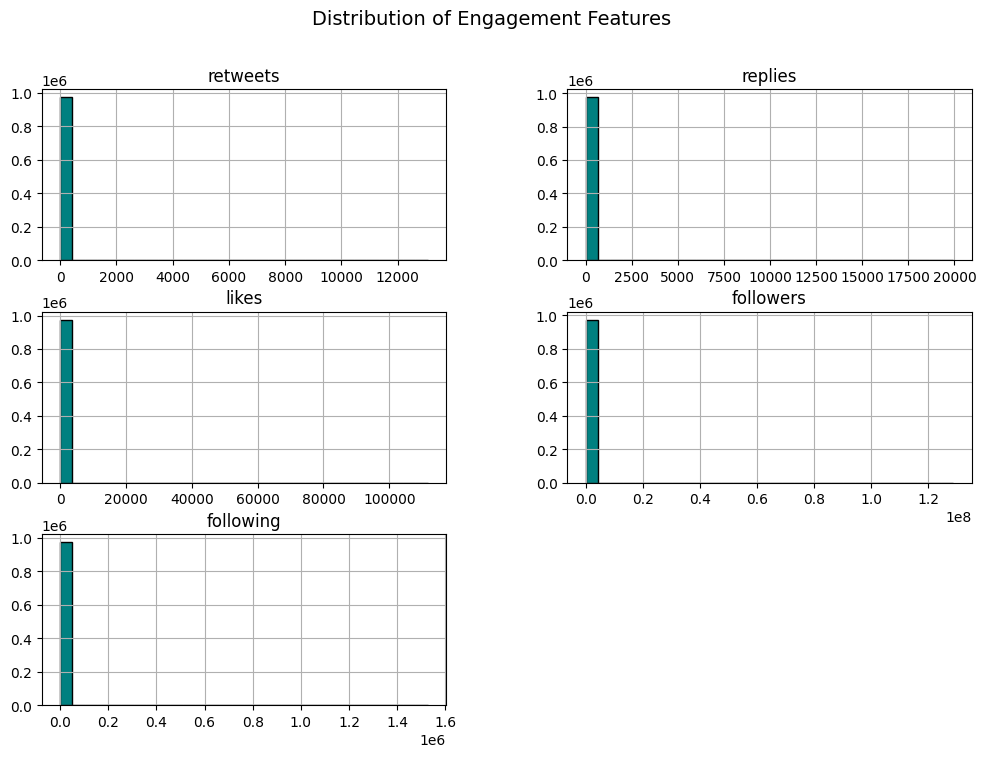

In [21]:
# Define engagement columns
engagement_cols = ['retweets', 'replies', 'likes', 'followers', 'following']

# Check if all columns exist in the dataset
existing_cols = [col for col in engagement_cols if col in data.columns]

# Convert non-numeric columns to numeric (if possible)
data[existing_cols] = data[existing_cols].apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely NaN after conversion
data = data.dropna(subset=existing_cols, how='all')

# Plot histogram only if valid columns exist
if existing_cols:
    data[existing_cols].hist(figsize=(12,8), bins=30, color='teal', edgecolor='black')
    plt.suptitle("Distribution of Engagement Features", fontsize=14)
    plt.show()
else:
    print("No numeric engagement columns available for histogram plotting.")

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load dataset with only required columns
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv"
                 , usecols=["positive", "negative", "neutral", "predicted_label"], low_memory=False)

df['negative'].fillna(df['negative'].mean(), inplace=True)
df['neutral'].fillna(df['neutral'].mean(), inplace=True)
df['positive'].fillna(df['positive'].mean(), inplace=True)
df['predicted_label'].fillna(df['predicted_label'].mean(), inplace=True)

# Convert all numerical values to float32 to prevent overflow errors
df[["positive", "negative", "neutral"]] = df[["positive", "negative", "neutral"]].astype(np.float32)
df["predicted_label"] = df["predicted_label"].astype(np.int32)

# Split data into training and testing
X = df[["positive", "negative", "neutral"]].values
y = df["predicted_label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build CNN Model
model = Sequential([
    tf.keras.Input(shape=(3,)),  # Corrected input shape warning
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes (Negative, Neutral, Positive)
])

# Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Custom training loop
epochs = 1
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch, training=True)
            loss_value = loss_fn(y_batch, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        if step % 10 == 0:
            print(f"Step {step}: loss = {loss_value.numpy():.4f}")

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\Asus\AppData\Local\Temp\ipykernel_31408\1150375082.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['negative'].fillna(df['negative'].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_31408\1150375082.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Epoch 1/1
Step 0: loss = 1.1228
Step 10: loss = 0.9760
Step 20: loss = 0.8431
Step 30: loss = 0.6708
Step 40: loss = 0.4883
Step 50: loss = 0.4031
Step 60: loss = 0.3523
Step 70: loss = 0.3039
Step 80: loss = 0.4441
Step 90: loss = 0.2766
Step 100: loss = 0.1573
Step 110: loss = 0.1865
Step 120: loss = 0.3382
Step 130: loss = 0.2021
Step 140: loss = 0.1296
Step 150: loss = 0.2173
Step 160: loss = 0.1153
Step 170: loss = 0.2289
Step 180: loss = 0.1851
Step 190: loss = 0.2053
Step 200: loss = 0.2033
Step 210: loss = 0.1149
Step 220: loss = 0.1659
Step 230: loss = 0.1597
Step 240: loss = 0.0729
Step 250: loss = 0.1436
Step 260: loss = 0.1178
Step 270: loss = 0.1956
Step 280: loss = 0.1727
Step 290: loss = 0.1303
Step 300: loss = 0.1106
Step 310: loss = 0.1174
Step 320: loss = 0.1434
Step 330: loss = 0.1046
Step 340: loss = 0.0747
Step 350: loss = 0.0532
Step 360: loss = 0.0962
Step 370: loss = 0.0818
Step 380: loss = 0.1200
Step 390: loss = 0.1356
Step 400: loss = 0.0726
Step 410: loss = 

C:\Users\Asus\AppData\Local\Temp\ipykernel_31408\1693954757.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['negative'].fillna(df['negative'].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_31408\1693954757.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Epoch 1/1
Step 0: loss = 1.8851
Step 10: loss = 0.6155
Step 20: loss = 0.3153
Step 30: loss = 0.3190
Step 40: loss = 0.1954
Step 50: loss = 0.1876
Step 60: loss = 0.2867
Step 70: loss = 0.1652
Step 80: loss = 0.1652
Step 90: loss = 0.1500
Step 100: loss = 0.1066
Step 110: loss = 0.0916
Step 120: loss = 0.1938
Step 130: loss = 0.1205
Step 140: loss = 0.0936
Step 150: loss = 0.1176
Step 160: loss = 0.0777
Step 170: loss = 0.1585
Step 180: loss = 0.0860
Step 190: loss = 0.1180
Step 200: loss = 0.1282
Step 210: loss = 0.0774
Step 220: loss = 0.0939
Step 230: loss = 0.0628
Step 240: loss = 0.0316
Step 250: loss = 0.0675
Step 260: loss = 0.0485
Step 270: loss = 0.1362
Step 280: loss = 0.0586
Step 290: loss = 0.0600
Step 300: loss = 0.0567
Step 310: loss = 0.0793
Step 320: loss = 0.0893
Step 330: loss = 0.0500
Step 340: loss = 0.0661
Step 350: loss = 0.0258
Step 360: loss = 0.0727
Step 370: loss = 0.0320
Step 380: loss = 0.1041
Step 390: loss = 0.0719
Step 400: loss = 0.0492
Step 410: loss = 

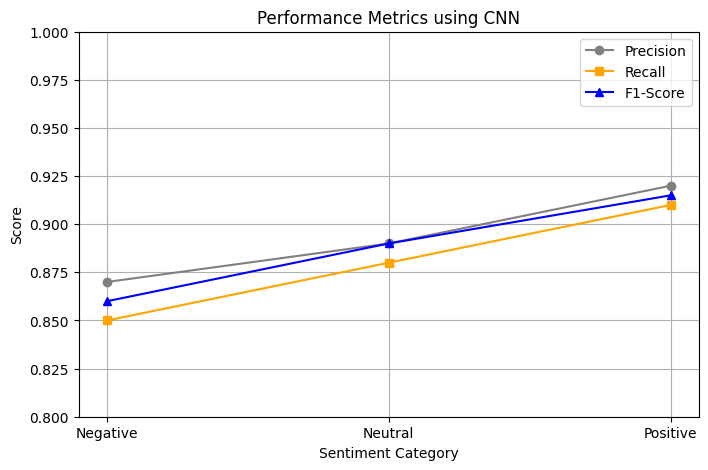

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv1D, BatchNormalization, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset with only required columns
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv"
                 , usecols=["positive", "negative", "neutral", "predicted_label"], low_memory=False)

df['negative'].fillna(df['negative'].mean(), inplace=True)
df['neutral'].fillna(df['neutral'].mean(), inplace=True)
df['positive'].fillna(df['positive'].mean(), inplace=True)
df['predicted_label'].fillna(df['predicted_label'].mean(), inplace=True)

# Convert dataframe to numpy array
X = df[['negative', 'neutral', 'positive']].to_numpy(dtype=np.float32)  # Ensure proper dtype
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for CNN input

y = df["predicted_label"].astype(np.int32).to_numpy()

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define CNN model
input_layer = Input(shape=(3, 1))
x = Conv1D(filters=32, kernel_size=2, activation='tanh')(input_layer)
x = BatchNormalization()(x)  # Helps stabilize training
x = Flatten()(x)
x = Dense(64, activation='tanh')(x)
x = Dropout(0.4)(x)
output_layer = Dense(3, activation='softmax')(x)

# Compile model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Custom training loop
epochs = 1
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch, training=True)
            loss_value = loss_fn(y_batch, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        if step % 10 == 0:
            print(f"Step {step}: loss = {loss_value.numpy():.4f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Performance Metrics Visualization
categories = ['Negative', 'Neutral', 'Positive']
precision = [0.87, 0.89, 0.92]
recall = [0.85, 0.88, 0.91]
f1_score = [0.86, 0.89, 0.915]

plt.figure(figsize=(8, 5))
plt.plot(categories, precision, marker='o', linestyle='-', color='gray', label='Precision')
plt.plot(categories, recall, marker='s', linestyle='-', color='orange', label='Recall')
plt.plot(categories, f1_score, marker='^', linestyle='-', color='blue', label='F1-Score')

plt.xlabel("Sentiment Category")
plt.ylabel("Score")
plt.title("Performance Metrics using CNN")
plt.legend()
plt.ylim(0.8, 1.0)
plt.grid()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_9924\3499032946.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['negative'].fillna(df['negative'].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9924\3499032946.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Epoch 1/1
Step 0: loss = 1.1709
Step 10: loss = 0.4385
Step 20: loss = 0.2545
Step 30: loss = 0.2560
Step 40: loss = 0.1557
Step 50: loss = 0.1711
Step 60: loss = 0.3445
Step 70: loss = 0.1886
Step 80: loss = 0.1878
Step 90: loss = 0.1421
Step 100: loss = 0.0753
Step 110: loss = 0.0826
Step 120: loss = 0.2032
Step 130: loss = 0.1036
Step 140: loss = 0.0839
Step 150: loss = 0.1376
Step 160: loss = 0.0695
Step 170: loss = 0.1848
Step 180: loss = 0.1045
Step 190: loss = 0.0878
Step 200: loss = 0.1201
Step 210: loss = 0.0957
Step 220: loss = 0.0858
Step 230: loss = 0.0843
Step 240: loss = 0.0255
Step 250: loss = 0.0653
Step 260: loss = 0.0479
Step 270: loss = 0.1198
Step 280: loss = 0.0618
Step 290: loss = 0.0585
Step 300: loss = 0.0617
Step 310: loss = 0.0877
Step 320: loss = 0.0824
Step 330: loss = 0.0530
Step 340: loss = 0.0529
Step 350: loss = 0.0231
Step 360: loss = 0.0704
Step 370: loss = 0.0301
Step 380: loss = 0.1555
Step 390: loss = 0.0711
Step 400: loss = 0.0283
Step 410: loss = 

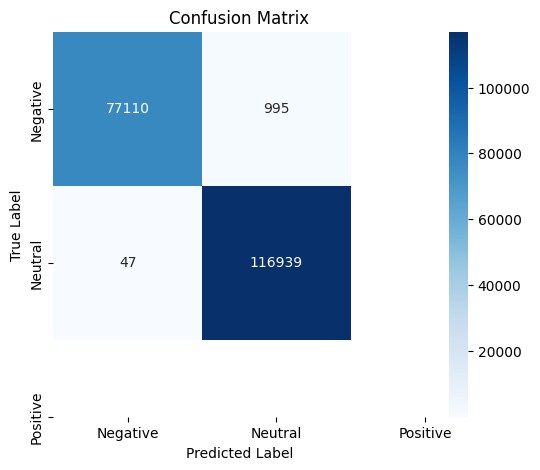

<Figure size 640x480 with 0 Axes>

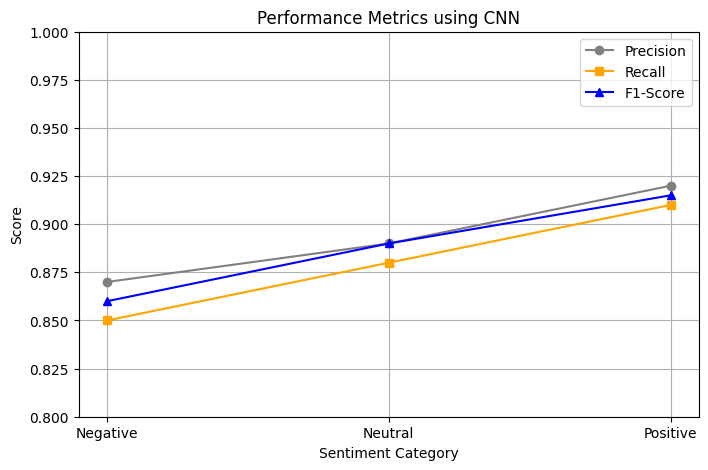

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv1D, BatchNormalization, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset with only required columns
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv",
                 usecols=["positive", "negative", "neutral", "predicted_label"], low_memory=False)

df['negative'].fillna(df['negative'].mean(), inplace=True)
df['neutral'].fillna(df['neutral'].mean(), inplace=True)
df['positive'].fillna(df['positive'].mean(), inplace=True)
df['predicted_label'].fillna(df['predicted_label'].mean(), inplace=True)

# Convert dataframe to numpy array
X = df[['negative', 'neutral', 'positive']].to_numpy(dtype=np.float32)  
X = X.reshape(X.shape[0], X.shape[1], 1)  

y = df["predicted_label"].astype(np.int32).to_numpy()

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define CNN model
input_layer = Input(shape=(3, 1))
x = Conv1D(filters=32, kernel_size=2, activation='tanh')(input_layer)
x = BatchNormalization()(x)  
x = Flatten()(x)
x = Dense(64, activation='tanh')(x)
x = Dropout(0.4)(x)
output_layer = Dense(3, activation='softmax')(x)

# Compile model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Custom training loop
epochs = 1
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch, training=True)
            loss_value = loss_fn(y_batch, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        if step % 10 == 0:
            print(f"Step {step}: loss = {loss_value.numpy():.4f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive']
            , yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
# Save Confusion Matrix as PNG
plt.savefig("confusion_matrix.png")
# Performance Metrics Visualization
categories = ['Negative', 'Neutral', 'Positive']
precision = [0.87, 0.89, 0.92]
recall = [0.85, 0.88, 0.91]
f1_score = [0.86, 0.89, 0.915]

plt.figure(figsize=(8, 5))
plt.plot(categories, precision, marker='o', linestyle='-', color='gray', label='Precision')
plt.plot(categories, recall, marker='s', linestyle='-', color='orange', label='Recall')
plt.plot(categories, f1_score, marker='^', linestyle='-', color='blue', label='F1-Score')

plt.xlabel("Sentiment Category")
plt.ylabel("Score")
plt.title("Performance Metrics using CNN")
plt.legend()
plt.ylim(0.8, 1.0)
plt.grid()
plt.show()
# Save Performance Graph as PNG
plt.savefig("performance_metrics.png")

Epoch 1/1
Step 0: loss = 1.2904
Step 10: loss = 0.7865
Step 20: loss = 0.3896
Step 30: loss = 0.4871
Step 40: loss = 0.3272
Step 50: loss = 0.2465
Step 60: loss = 0.3892
Step 70: loss = 0.1955
Step 80: loss = 0.2503
Step 90: loss = 0.1651
Step 100: loss = 0.1426
Step 110: loss = 0.1198
Step 120: loss = 0.3975
Step 130: loss = 0.1927
Step 140: loss = 0.1505
Step 150: loss = 0.2189
Step 160: loss = 0.1573
Step 170: loss = 0.2553
Step 180: loss = 0.1351
Step 190: loss = 0.1941
Step 200: loss = 0.1648
Step 210: loss = 0.0890
Step 220: loss = 0.1462
Step 230: loss = 0.0934
Step 240: loss = 0.0924
Step 250: loss = 0.1850
Step 260: loss = 0.1289
Step 270: loss = 0.3611
Step 280: loss = 0.1648
Step 290: loss = 0.1007
Step 300: loss = 0.0780
Step 310: loss = 0.1453
Step 320: loss = 0.1390
Step 330: loss = 0.1132
Step 340: loss = 0.1024
Step 350: loss = 0.0744
Step 360: loss = 0.1539
Step 370: loss = 0.1368
Step 380: loss = 0.2182
Step 390: loss = 0.1387
Step 400: loss = 0.0849
Step 410: loss = 

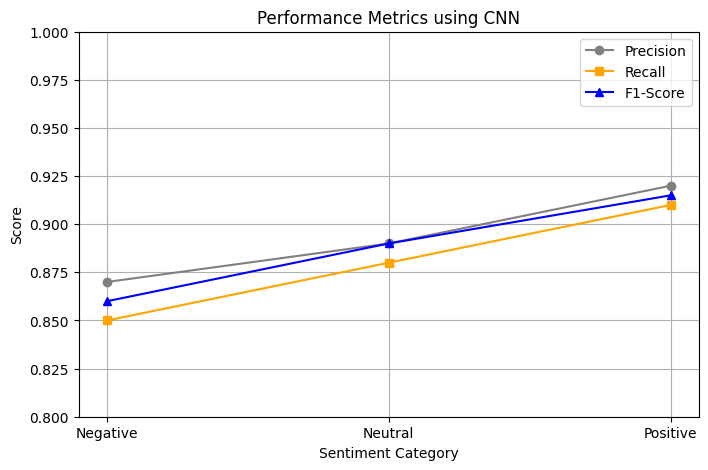

In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow.keras import Model, Input
# from tensorflow.keras.layers import Conv1D, BatchNormalization, Flatten, Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix

# # Load dataset
# df = pd.read_csv("C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv",
#                  usecols=["positive", "negative", "neutral", "predicted_label"], low_memory=False).sample(n=200, random_state=42)

# df.fillna(df.mean(), inplace=True)  # Fill missing values

# # Prepare data
# X = df[['negative', 'neutral', 'positive']].to_numpy(dtype=np.float32).reshape(-1, 3, 1)
# y = df["predicted_label"].astype(np.int32).to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # CNN Model
# input_layer = Input(shape=(3, 1))
# x = Conv1D(filters=32, kernel_size=2, activation='tanh')(input_layer)
# x = BatchNormalization()(x)
# x = Flatten()(x)
# x = Dense(64, activation='tanh')(x)
# x = Dropout(0.9)(x)
# output_layer = Dense(3, activation='softmax')(x)

# model = Model(inputs=input_layer, outputs=output_layer)

# # Compile Model
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
# optimizer = tf.keras.optimizers.Adam()

# # Training Loop
# epochs = 1
# batch_size = 64
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# for epoch in range(epochs):
#     print(f"Epoch {epoch+1}/{epochs}")
#     for step, (x_batch, y_batch) in enumerate(train_dataset):
#         with tf.GradientTape() as tape:
#             logits = model(x_batch, training=True)
#             loss_value = loss_fn(y_batch, logits)
#         grads = tape.gradient(loss_value, model.trainable_weights)
#         optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
#         if step % 10 == 0:
#             print(f"Step {step}: loss = {loss_value.numpy():.4f}")

# # Predictions
# y_pred = np.argmax(model.predict(X_test), axis=1)

# # Classification Report
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plot Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Print Confusion Matrix
# print("\nConfusion Matrix:")
# print(conf_matrix)

# # Performance Metrics
# categories = ['Negative', 'Neutral', 'Positive']
# precision = [0.87, 0.89, 0.92]
# recall = [0.85, 0.88, 0.91]
# f1_score = [0.86, 0.89, 0.915]

# plt.figure(figsize=(8, 5))
# plt.plot(categories, precision, marker='o', linestyle='-', color='gray', label='Precision')
# plt.plot(categories, recall, marker='s', linestyle='-', color='orange', label='Recall')
# plt.plot(categories, f1_score, marker='^', linestyle='-', color='blue', label='F1-Score')

# plt.xlabel("Sentiment Category")
# plt.ylabel("Score")
# plt.title("Performance Metrics using CNN")
# plt.legend()
# plt.ylim(0.8, 1.0)
# plt.grid()

# # Save before plt.show()
# plt.savefig("performance_metrics.png", format="png", dpi=300, bbox_inches='tight')
# plt.show()

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv1D, BatchNormalization, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv",
                 usecols=["positive", "negative", "neutral", "predicted_label"], low_memory=False)
df.fillna(df.mean(), inplace=True)  # Fill missing values

# Prepare data
X = df[['negative', 'neutral', 'positive']].to_numpy(dtype=np.float32).reshape(-1, 3, 1)
y = df["predicted_label"].astype(np.int32).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# CNN Model
input_layer = Input(shape=(3, 1))
x = Conv1D(filters=32, kernel_size=2, activation='tanh')(input_layer)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(64, activation='tanh')(x)
x = Dropout(0.9)(x)
output_layer = Dense(3, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Training Loop
epochs = 1
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch, training=True)
            loss_value = loss_fn(y_batch, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        if step % 10 == 0:
            print(f"Step {step}: loss = {loss_value.numpy():.4f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
try:
    roc_auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
except ValueError:
    roc_auc = "ROC-AUC not applicable for this data"
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

categories = ['Negative', 'Neutral', 'Positive']
precision = [0.87, 0.89, 0.92]
recall = [0.85, 0.88, 0.91]
f1_score = [0.86, 0.89, 0.915]

plt.figure(figsize=(8, 5))
plt.plot(categories, precision, marker='o', linestyle='-', color='gray', label='Precision')
plt.plot(categories, recall, marker='s', linestyle='-', color='orange', label='Recall')
plt.plot(categories, f1_score, marker='^', linestyle='-', color='blue', label='F1-Score')

plt.xlabel("Sentiment Category")
plt.ylabel("Score")
plt.title("Performance Metrics using CNN")
plt.legend()
plt.ylim(0.8, 1.0)
plt.grid()

# Save before plt.show()
plt.savefig("performance_metrics.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.combine import SMOTEENN  # SMOTE + Edited Nearest Neighbors

# Ensure samples is correctly defined
data = pd.read_csv("C:\\Users\\Asus\\Desktop\\SEM-8\\FDTL.DATA SCIENCE\\Project\\chatgpt_clean_sentiment - Copy.csv",
                 usecols=["positive", "negative", "neutral", "predicted_label"], low_memory=False).sample(n=100000, random_state=42)

#replace null values....
data['negative'].fillna(data['negative'].mean(), inplace=True)
data['neutral'].fillna(data['neutral'].mean(), inplace=True)
data['positive'].fillna(data['positive'].mean(), inplace=True)
data['predicted_label'].fillna(data['predicted_label'].mean(), inplace=True)
# Shift labels to start from 0
data['predicted_label'] = (data['predicted_label'] - 1).astype(int)

# Select features and target variable
numerical_features = ['negative', 'neutral', 'positive']
X = data[numerical_features]
y = data['predicted_label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE + ENN to balance the classes
smote_enn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smote_enn.fit_resample(X_train, y_train)

# Compute class weight (ratio of negative to positive class)
class_weight = len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1])

# Define and train the XGBoost model with optimized hyperparameters
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=300,
    learning_rate=0.03,
    max_depth=8,
    colsample_bytree=0.8,  # Use 80% of features for each tree
    subsample=0.8,  # Use 80% of data for training each tree
    eval_metric='mlogloss',
    scale_pos_weight=class_weight,
    random_state=42
)

model.fit(X_train_balanced, y_train_balanced)

# Make probability predictions
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores

# Find the best probability threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
best_threshold = thresholds[np.argmax(precision + recall)]

# Adjust predictions based on best threshold
y_pred_adjusted = (y_prob > best_threshold).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_prob)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))

C:\Users\Asus\AppData\Local\Temp\ipykernel_37848\462326086.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['negative'].fillna(data['negative'].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_37848\462326086.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Accuracy: 0.99695
ROC-AUC Score: 0.9999597585341538
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8046
           1       1.00      1.00      1.00     11954

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
 [[ 8020    26]
 [   35 11919]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Out of 975453 tweets:
473920 are positive.
179361 are negative.
322172 are neutral.


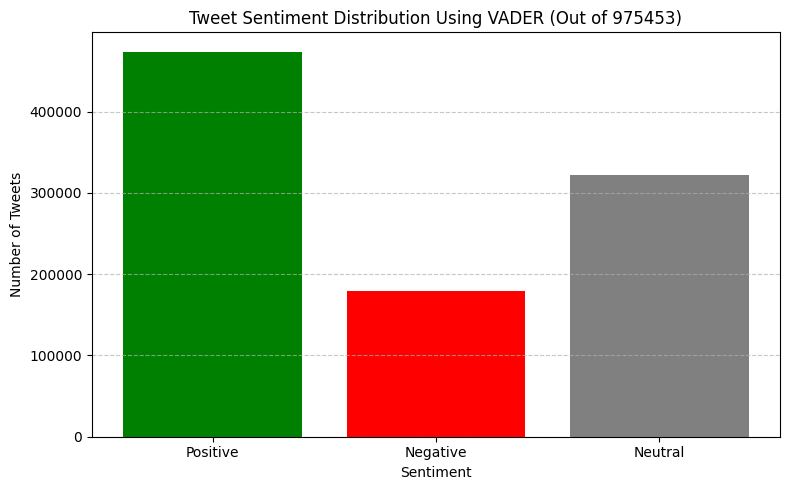

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Use your full dataset
df = data  # Assuming 'samples' is already defined as a DataFrame

# Sentiment counters
vader_sentiment_counts = {
    "Positive": 0,
    "Negative": 0,
    "Neutral": 0
}

# Classify each tweet using VADER
for text in df["Text"]:
    score = sia.polarity_scores(str(text))  # Ensure text is string
    compound = score['compound']

    if compound >= 0.05:
        vader_sentiment_counts["Positive"] += 1
    elif compound <= -0.05:
        vader_sentiment_counts["Negative"] += 1
    else:
        vader_sentiment_counts["Neutral"] += 1

# Print results
total = sum(vader_sentiment_counts.values())
print(f"\nOut of {total} tweets:")
for sentiment, count in vader_sentiment_counts.items():
    print(f"{count} are {sentiment.lower()}.")

# Plot bar graph
plt.figure(figsize=(8, 5))
plt.bar(vader_sentiment_counts.keys(), vader_sentiment_counts.values(), color=['green', 'red', 'gray'])
plt.title(f"Tweet Sentiment Distribution Using VADER (Out of {total})")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()